## Загружаем необходимые библиотеки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Загружаем данные

Собраны данные:
- age: возраст
- workclass: рабочий класс
- fnlwgt: спец код
- education: образование
- education-num: образование код
- marital-status: семейное положение
- occupation: род занятий
- relationship: родство
- race: раса
- sex: пол
- capital-gain: прирост капитала
- capital-loss: потеря капитала
- hours-per-week: рабочих часов в неделю
- native-country: родная страна
- class: зарплата (<=50K или >50K) - этот показатель будем предсказывать

In [2]:
data = pd.read_csv('adult.data', header=None, names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'class' ])
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## На первый взгляд все данные есть - но нужно обязательно проверять данные, которые приходят для работы!

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  class           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [5]:
#workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov,
#Local-gov, State-gov, Without-pay, Never-worked.
data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [6]:
# Здесь видим, что некоторые даннные просто заполнены знаком пробела, поэтому заменяем знак пробела на Nan
data['workclass'] = data['workclass'].replace(' ?', np.nan)

In [7]:
data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [8]:
data['workclass'].isna().sum()
#считаем кол-во строк с Nan - 1836 штук достаточно большое кол-во далее подумаем как лучше с ними поступить

np.int64(1836)

In [9]:
#education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th,
#7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool
data['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [10]:
#marital-status: Married-civ-spouse, Divorced, Never-married, Separated,
#Widowed, Married-spouse-absent, Married-AF-spouse.
data['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [11]:
#occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial,
#Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving,
#Priv-house-serv, Protective-serv, Armed-Forces.
data['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [12]:

data['occupation'] = data['occupation'].replace(' ?', np.nan)
# Здесь тоже видим, что некоторые даннные просто заполнены знаком пробела, поэтому заменяем знак пробела на Nan

In [13]:
data['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', nan, ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [14]:
data['occupation'].isna().sum()
#считаем кол-во строк с Nan - 1834 штук

np.int64(1843)

In [15]:
#relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried
data['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [16]:
#race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
data['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [17]:
#sex: Female, Male.
data['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [18]:
#native-country: United-States, Cambodia, England, Puerto-Rico, Canada,
#Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China,
#Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal,
#Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala,
#Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador,
#Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
data['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [19]:

data['native-country'] = data['native-country'].replace(' ?', np.nan)
#заменяем знак пробела на Nan

In [20]:
data['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', nan, ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [21]:
data['native-country'].isna().sum()
#считаем кол-во строк с Nan - 583 штуки

np.int64(583)

In [22]:
data['class'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [23]:
data.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
class                0
dtype: int64

In [24]:
# Удаляем строки, где нет информации о роде занятий np.int64(1843) data['occupation']
data = data[~(data['occupation'].isna())]

In [25]:
data.isna().sum()

age                 0
workclass           0
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation          0
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    556
class               0
dtype: int64

In [26]:
# Удаляем строки, где нет информации о родной стране np.int64(556) data['native-country']
data = data[~(data['native-country'].isna())]

In [27]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  class           30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Строим графики и диаграммы, чтобы увидеть зависимости более наглядно.

<Axes: xlabel='class', ylabel='age'>

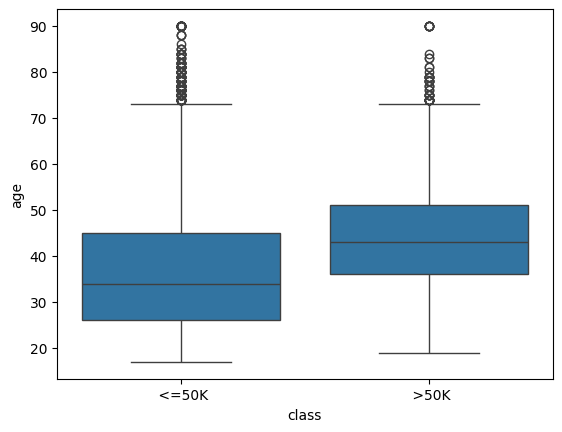

In [29]:
import seaborn as sns

sns.boxplot(data=data, x='class', y='age')

Прослеживается тенденция (если не смотреть выбросы люди старше 70 лет), что люди старше 40 лет получают в среднем >50K чаще

<Axes: xlabel='count', ylabel='education'>

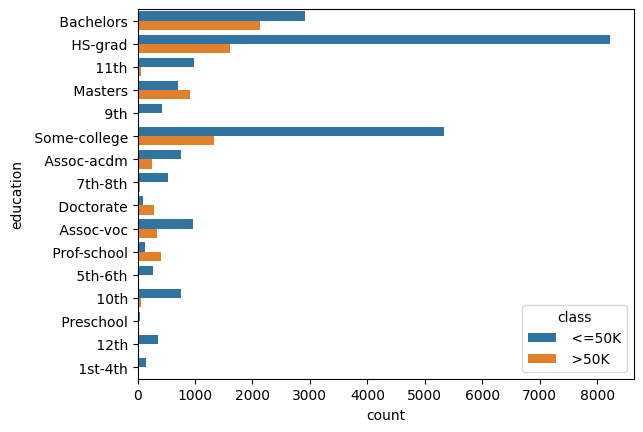

In [30]:
sns.countplot(data=data, y='education', hue='class')

Люди с высшем образованием чаще имеют зарплату >50K

<Axes: xlabel='count', ylabel='occupation'>

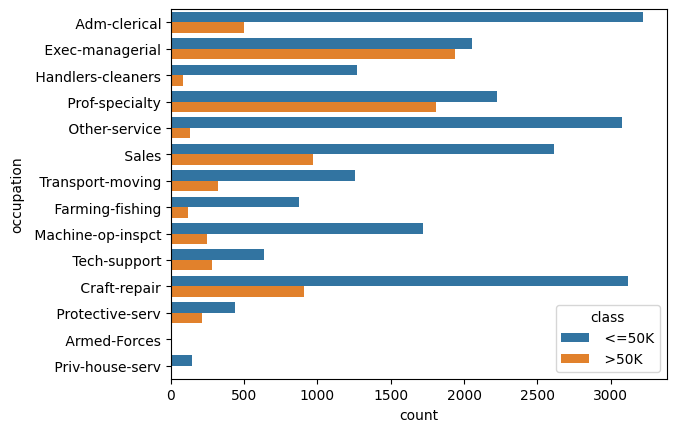

In [31]:
sns.countplot(data=data, y='occupation', hue='class')

<Axes: xlabel='count', ylabel='workclass'>

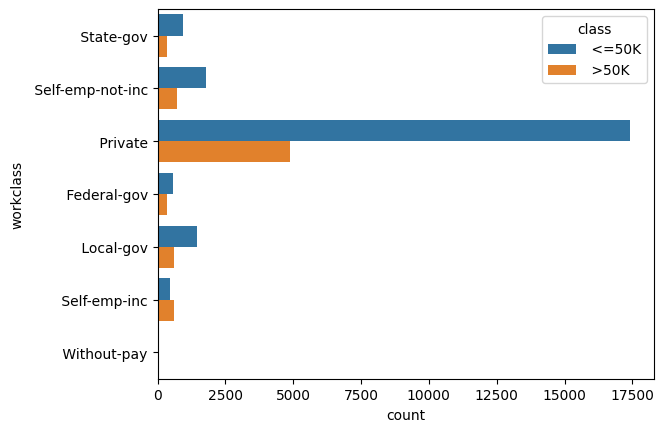

In [32]:
sns.countplot(data=data, y='workclass', hue='class')

<Axes: xlabel='sex', ylabel='count'>

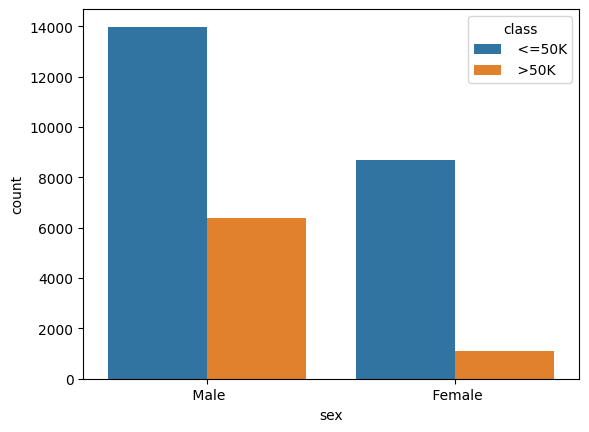

In [33]:
sns.countplot(data=data, x='sex', hue='class')

# мужчины в % соотношении чаще имеют зарплату >50K, чем женщины

In [34]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


sex
Female    0.113678
Male      0.313837
Name: class_numeric, dtype: float64


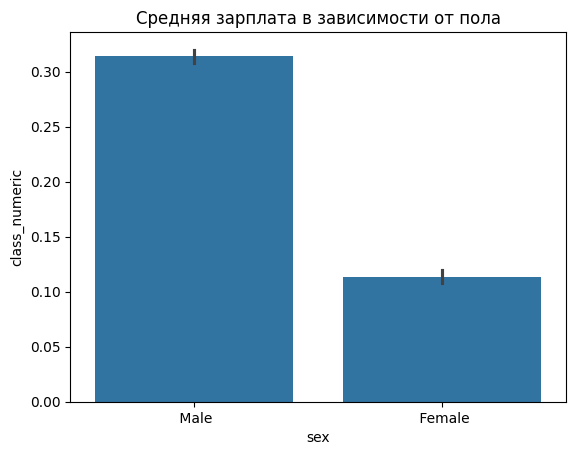

In [35]:
# Преобразуем class в числовую переменную: <=50K -> 0, >50K -> 1
data["class_numeric"] = data["class"].str.strip().apply(lambda x: 0 if x == "<=50K" else 1)

# Посмотрим зависит ли средняя зарплата по полу
mean_by_sex = data.groupby("sex")["class_numeric"].mean()
print(mean_by_sex)

# Визуализация
sns.barplot(x="sex", y="class_numeric", data=data, estimator="mean")
plt.title("Средняя зарплата в зависимости от пола")
plt.show()

native-country
Taiwan                        0.452381
France                        0.444444
Iran                          0.428571
India                         0.400000
Japan                         0.389831
Cambodia                      0.388889
Yugoslavia                    0.375000
Italy                         0.352941
England                       0.348837
Germany                       0.343750
Canada                        0.336449
Philippines                   0.319149
Hong                          0.315789
China                         0.294118
Greece                        0.275862
Cuba                          0.271739
United-States                 0.254327
Hungary                       0.230769
Ireland                       0.208333
South                         0.197183
Poland                        0.196429
Scotland                      0.181818
Thailand                      0.176471
Ecuador                       0.148148
Jamaica                       0.125000
Portugal  

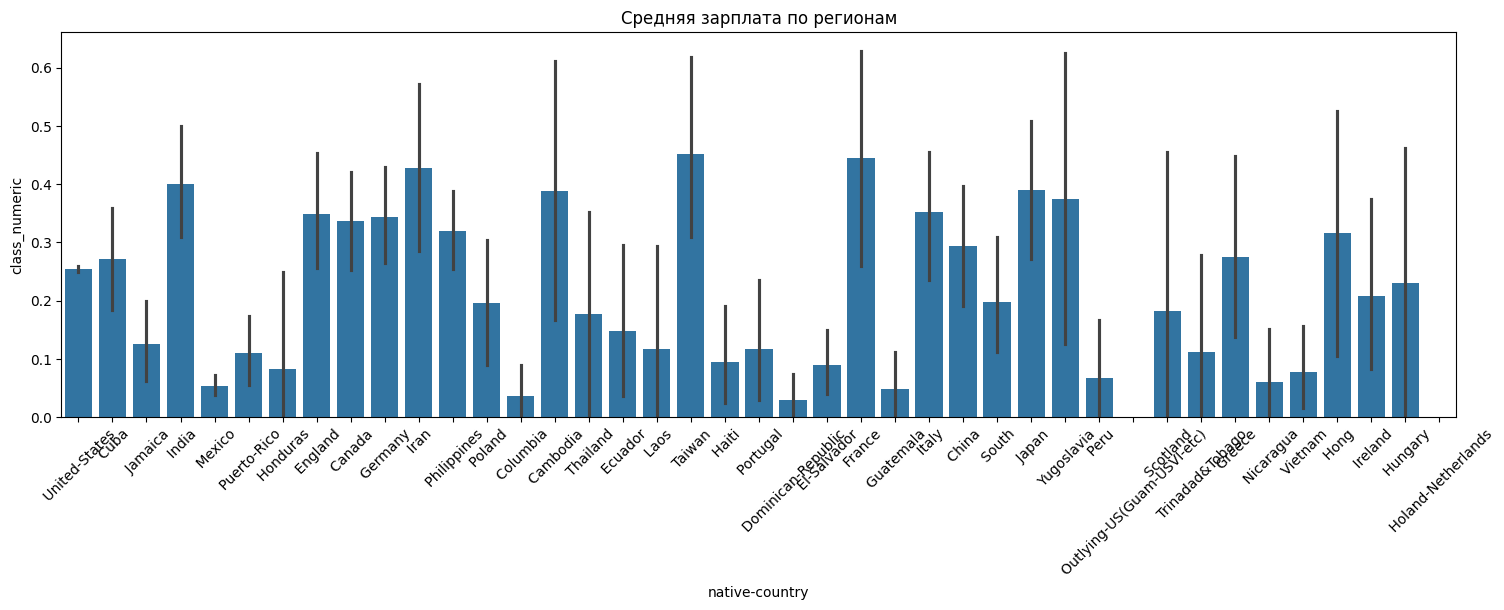

In [36]:
# Посмотрим влияет ли регион на среднюю зарплату
mean_by_region = data.groupby("native-country")["class_numeric"].mean().sort_values(ascending=False)
print(mean_by_region)

# Визуализация
plt.figure(figsize=(18,5))
sns.barplot(x="native-country", y="class_numeric", data=data, estimator="mean")
plt.xticks(rotation=45)
plt.title("Средняя зарплата по регионам")
plt.show()


- Разница между странами очень большая.
- В некоторых странах, например, Iran (41.9%), France (41.4%), India (40%), значительная доля людей зарабатывает >50K.
- В других странах, например, Outlying-US(Guam-USVI-etc) и Holand-Netherlands, почти никто не зарабатывает >50K.
- США не на первом месте.
- Хотя большинство людей из датасета, вероятно, из United-States, их доля с зарплатой >50K составляет 24.6%, что ниже, чем в ряде других стран.

# Можно видеть явное влияние региона.

Это говорит о том, что страна проживания / регион действительно связан с вероятностью высокой зарплаты - возможно, из-за экономических условий, профессий, представленных в датасете, или структуры миграции.

In [37]:
#Преобразуем категориальные признаки
data = pd.get_dummies(data, columns=['workclass', 'education', 'marital-status','occupation', 'relationship', 'race', 'sex', 'native-country'], drop_first=True)


In [38]:
X = data.drop(columns=['class', 'class_numeric'])
X.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,40,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,40,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,40,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [39]:
X = X.astype(int) #false / true в 0 / 1
X.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
y = data['class']
y

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: class, Length: 30162, dtype: object

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [42]:
le.fit(data['class'])

LabelEncoder()

In [43]:
le.classes_

array([' <=50K', ' >50K'], dtype=object)

In [44]:
le.inverse_transform([1, 0, 1])

array([' >50K', ' <=50K', ' >50K'], dtype=object)

In [45]:
y = pd.Series(data=le.transform(data['class']))
y.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

scaler = StandardScaler()

model = LogisticRegression(max_iter=1000)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2025)
X_test.index

Index([ 8220, 18425, 23567, 16839,  4831, 25738, 15925, 28069, 29985, 20349,
       ...
       26173, 10427, 12938, 21700, 26075,  6083,   418, 12235, 20673,  5385],
      dtype='int64', length=6033)

In [48]:
#стандартизация данных иначе модели не отрабатывают
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [49]:
predictions = model.predict(X_test_scaled)

In [50]:
predictions[:5]

array([0, 0, 1, 0, 0])

In [51]:
model.predict(X_test_scaled)

array([0, 0, 1, ..., 0, 0, 0], shape=(6033,))

In [52]:
model.predict_proba(X_test_scaled)

array([[0.57639729, 0.42360271],
       [0.95566982, 0.04433018],
       [0.16562377, 0.83437623],
       ...,
       [0.98439202, 0.01560798],
       [0.98125695, 0.01874305],
       [0.98858397, 0.01141603]], shape=(6033, 2))

In [53]:
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

print("=== Logistic Regression ===")
print("Train Accuracy:", model.score(X_train_scaled, y_train))
print("Test Accuracy:", model.score(X_test_scaled, y_test))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

=== Logistic Regression ===
Train Accuracy: 0.8496000663102491
Test Accuracy: 0.8481684070943146

Confusion Matrix:
 [[4253  341]
 [ 575  864]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      4594
           1       0.72      0.60      0.65      1439

    accuracy                           0.85      6033
   macro avg       0.80      0.76      0.78      6033
weighted avg       0.84      0.85      0.84      6033

ROC-AUC: 0.9047382708751149


In [54]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [55]:
y_pred_svc = clf.predict(X_test_scaled)

In [56]:
print("=== SVC ===")
print("Train Accuracy:", clf.score(X_train_scaled, y_train))
print("Test Accuracy:", clf.score(X_test_scaled, y_test))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svc))

=== SVC ===
Train Accuracy: 0.8600853744456878
Test Accuracy: 0.8468423669816012

Confusion Matrix:
 [[4284  310]
 [ 614  825]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      4594
           1       0.73      0.57      0.64      1439

    accuracy                           0.85      6033
   macro avg       0.80      0.75      0.77      6033
weighted avg       0.84      0.85      0.84      6033



- Train vs Test Accuracy близки, что значит модели не переобучены.
- Logistic Regression: ROC-AUC = 0.90 -> хорошее качество разделения классов.
- SVC: accuracy почти такая же.
- Меньший класс предсказывается хуже (recall ~0.6–0.65), что типично для несбалансированных данных.

## Визуализация наглядно

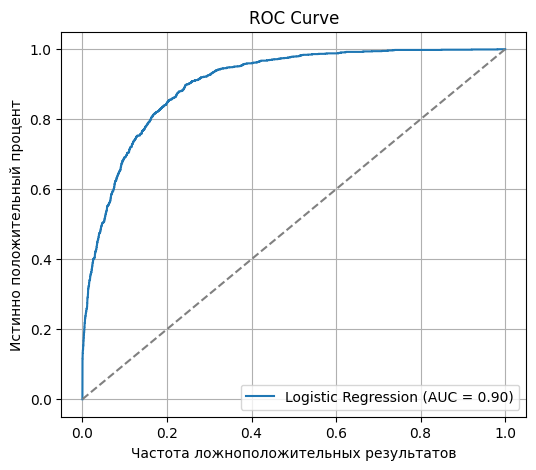

In [62]:
# Для логистической регрессии построим ROC-кривую, где будет видно хорошее качество претсказаний
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_proba):.2f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('Частота ложноположительных результатов')
plt.ylabel('Истинно положительный процент')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

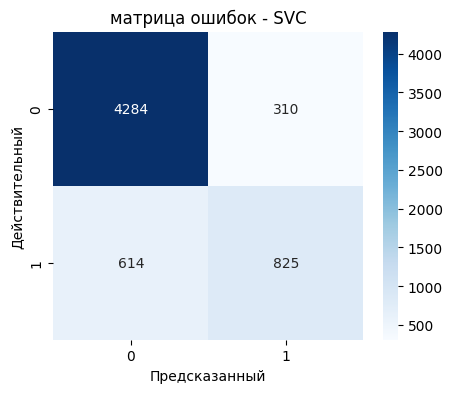

In [61]:
# Для SVC строим матрицу ошибок heatmap для наглядности
cm = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанный')
plt.ylabel('Действительный')
plt.title('матрица ошибок - SVC')
plt.show()

## Выводы
- Зарплата зависит от должности, опыта, пола и KPI.
- Образование и квалификация также влияют, но не всегда напрямую.